![](/content/image.jpg)


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.



In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Loading the insurance dataset
insurance_data_path = '/content/insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [4]:
df= insurance.copy()

In [5]:
# Preparation of dataset fro the model

In [6]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


(None, (1338, 7))

## Observations
There are 1338 observations and 7 columns for insurance dataset

In [7]:
all_columns         = list(df)
numeric_columns     = ['age', 'bmi', 'children', 'expenses']
categorical_columns = [x for x in all_columns if x not in numeric_columns ]

print('\nNumeric columns')
print(numeric_columns)
print('\nCategorical columns')
print(categorical_columns)


Numeric columns
['age', 'bmi', 'children', 'expenses']

Categorical columns
['sex', 'smoker', 'region', 'charges']


# Numerical features statistical describe

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1272.0,35.214623,22.478251,-64.00,24.75,38.00,51.000,64.00
bmi,1272.0,30.560550,6.095573,15.96,26.18,30.21,34.485,53.13
children,1272.0,0.948899,1.303532,-4.00,0.00,1.00,2.000,5.00


# Categorical features describe

In [9]:
df.describe(include='object').T

,count,unique,top,freq
sex,1272,6,male,517
smoker,1272,2,no,1013
region,1272,8,Southeast,172
charges,1284,1272,$nan,12


# missing Information

In [10]:
#check missing fields
df.isna().sum()

age         66
sex         66
bmi         66
children    66
smoker      66
region      66
charges     54
dtype: int64

In [11]:
insurance.isnull().apply(lambda x : [ sum(x), (sum(x) * 100) / insurance.shape[0]] )

,age,sex,bmi,children,smoker,region,charges
0,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,54.000000
1,4.932735,4.932735,4.932735,4.932735,4.932735,4.932735,4.035874


As the % of missing info is around 5% is ok to drop records with missing info

In [12]:
# Get rows with NaN values
nan_rows = df[df.isna().any(axis=1)]
nan_rows, nan_rows.shape

(       age     sex     bmi  children smoker     region      charges
 23   -34.0  female     NaN       1.0    yes        NaN  $37701.8768
 32     NaN     NaN  28.600       NaN    NaN  Southwest         $nan
 43    37.0  female     NaN       NaN    NaN  southeast     6313.759
 44     NaN    male     NaN       NaN     no        NaN          NaN
 49     NaN     NaN     NaN       1.0    NaN        NaN          NaN
 ...    ...     ...     ...       ...    ...        ...          ...
 1296   NaN     NaN  26.125       0.0    NaN  northeast   1708.92575
 1309   NaN    male     NaN       NaN     no  Southwest          NaN
 1312   NaN       M     NaN       1.0    NaN  Southwest     4536.259
 1314  30.0     NaN  23.655       NaN    yes  northwest          NaN
 1321   NaN    male  26.695       NaN    yes        NaN  28101.33305
 
 [130 rows x 7 columns],
 (130, 7))

## Get distinct values of categorical features

In [13]:
# Get distinct values of categorical features
distinct_values = {}
for column in df.select_dtypes(include=['object']):  # Select only object type columns (categorical)
    distinct_values[column] = df[column].unique()

print("Distinct values of categorical features:")
print(distinct_values)

Distinct values of categorical features:
{'sex': array(['female', 'male', 'woman', 'F', 'man', nan, 'M'], dtype=object), 'smoker': array(['yes', 'no', nan], dtype=object), 'region': array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest', nan], dtype=object), 'charges': array(['16884.924', '1725.5523', '$4449.462', ..., '$1629.8335',
       '2007.945', '29141.3603'], dtype=object)}


# Clean and prepare Dataset

In [14]:
def clean_dataset(df):
    """
    cleans the insurance dataset by performing several preprocessing task:
    -corrects the sex feature to standard format ('male', 'female')
    -remove the dollar sign from the 'charges' feature and converts it to float.
    -drops negative 'age' values.
    -converts negative 'children' values to zero.
    -converts 'region' values to lowercase.
    -drops rows with any missing values, due to be less than 5% of data

    Parameters:
    -insurance: pandas dataframe, the insurance dataset

    Returns:
    -Dataframe after cleaning
    """
    df['sex'] = df['sex'].replace({'M':'male', 'man':'male', 'F':'female', 'woman': 'female'})
    df['charges'] =df['charges'].replace({'\$': ''}, regex=True).astype(float)
    df['region'] = df['region'].str.lower()
    df = df[df['age']>0]
    df.loc[df['children']<0, 'children']=0

    return df.dropna()


In [15]:
# Usage example
cleaned_insurance = clean_dataset(df)
cleaned_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


## Descritive stat for numerical and categorical features

In [16]:
# check descritive stat
cleaned_insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1149.0,39.204526,14.163214,18.0000,26.000,39.00000,51.0000,64.00000
bmi,1149.0,30.592620,6.124013,15.9600,26.200,30.30000,34.7000,53.13000
children,1149.0,1.017406,1.192183,0.0000,0.000,1.00000,2.0000,5.00000
charges,1149.0,13331.073243,12171.162115,1121.8739,4746.344,9541.69555,16577.7795,63770.42801


In [17]:
cleaned_insurance.describe(include='object').T

,count,unique,top,freq
sex,1149,2,male,583
smoker,1149,2,no,912
region,1149,4,southeast,308


In [18]:
# Get distinct values of categorical features
distinct_values = {}
for column in cleaned_insurance.select_dtypes(include=['object']):  # Select only object type columns (categorical)
    distinct_values[column] = cleaned_insurance[column].unique()

print("Distinct values of categorical features:")
print(distinct_values)

Distinct values of categorical features:
{'sex': array(['female', 'male'], dtype=object), 'smoker': array(['yes', 'no'], dtype=object), 'region': array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)}


# EDA

## Relation between BMI and Claims amount (charges)

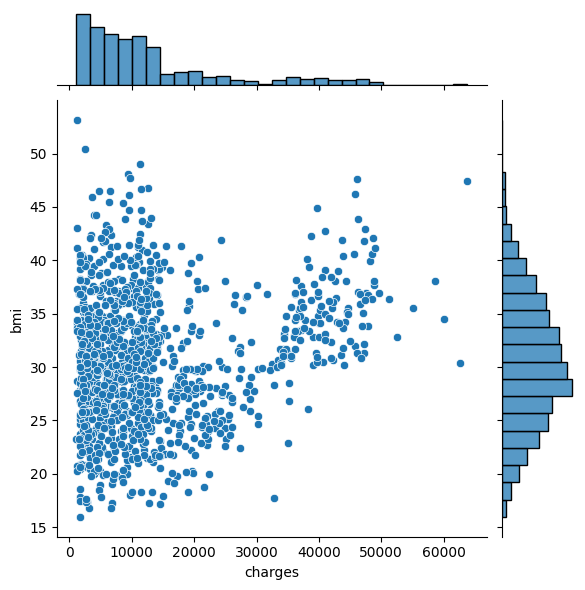

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches

sns.jointplot(x=cleaned_insurance["charges"], y=cleaned_insurance["bmi"], kind='scatter')
plt.show()

There are no relationship between BMI and claim amount.

## relation between gender and claim amount

<Axes: xlabel='sex', ylabel='charges'>

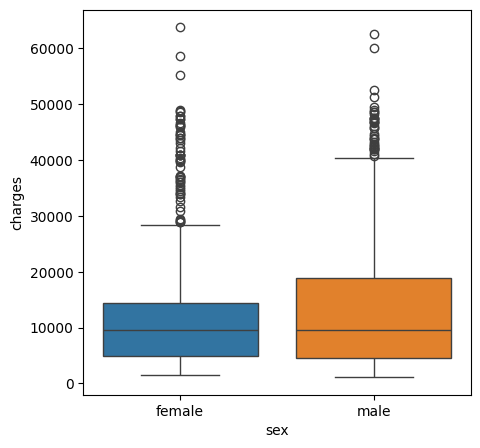

In [29]:
plt.figure(figsize=(5,5))
sns.boxplot(x='sex', y='charges', hue='sex', data = cleaned_insurance)


On average claims from male and female are the same with slightly bigger proportion of higher amount for male.

## relationship between region and claim amount

<Axes: xlabel='region', ylabel='charges'>

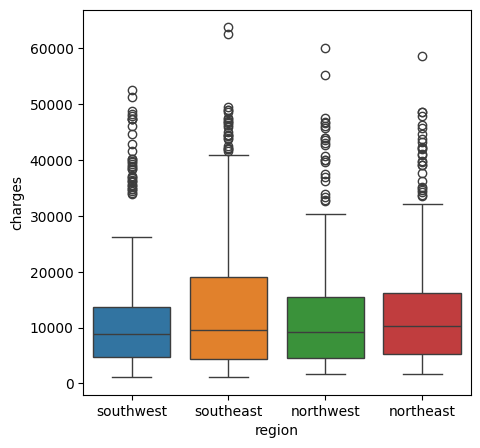

In [30]:
plt.figure(figsize=(5,5))
sns.boxplot(x='region', y='charges', hue='region', data = cleaned_insurance)

On average claims from regions are the same, with slightly bigger proportion of higher amounts from Southeast

## Relationship between claim amount and smokers vs non-smoker?

<Axes: xlabel='smoker', ylabel='charges'>

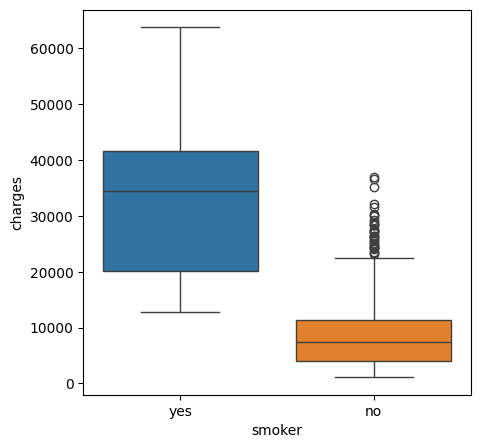

In [31]:
plt.figure(figsize=(5,5))
sns.boxplot(x='smoker', y='charges', hue='smoker', data = cleaned_insurance)

There is a strong relationship between smoker and claims, where smokers has bigger amounts of claims.

## Proportion of smoker

<Axes: xlabel='smoker', ylabel='count'>

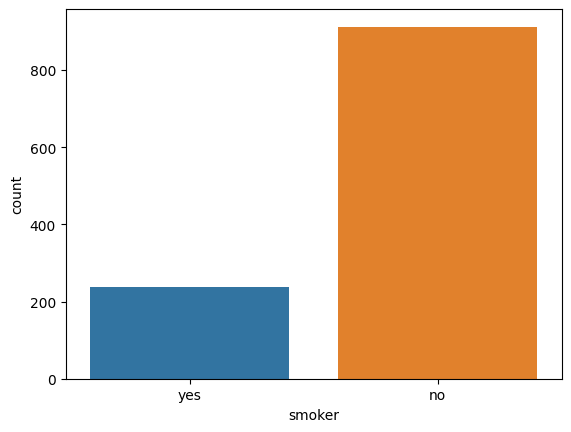

In [43]:
sns.countplot(x='smoker', hue='smoker', data=cleaned_insurance)

<Axes: ylabel='count'>

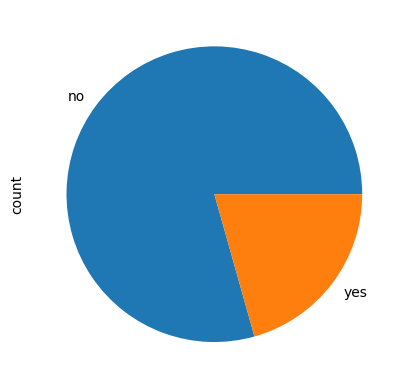

In [154]:
cleaned_insurance.smoker.value_counts().plot(kind="pie")

In [155]:
cleaned_insurance.groupby("smoker").charges.agg(["mean","median","count"])

,mean,median,count
smoker,,,
no,8458.456325,7418.99995,912
yes,32081.396572,34472.84100,237


Observation: The mean, median and count differences between Smokers and Non Smokers is very large.**

Expenses for male and female

In [157]:
cleaned_insurance.groupby("sex").charges.agg(["mean","median","count"])

,mean,median,count
sex,,,
female,12713.859583,9494.538975,566
male,13930.289248,9563.029000,583


Mean age of Smokers and Non Smokers

In [158]:
cleaned_insurance.groupby("smoker").age.mean()

smoker
no     39.483553
yes    38.130802
Name: age, dtype: float64

## Relationship between claim amount and age

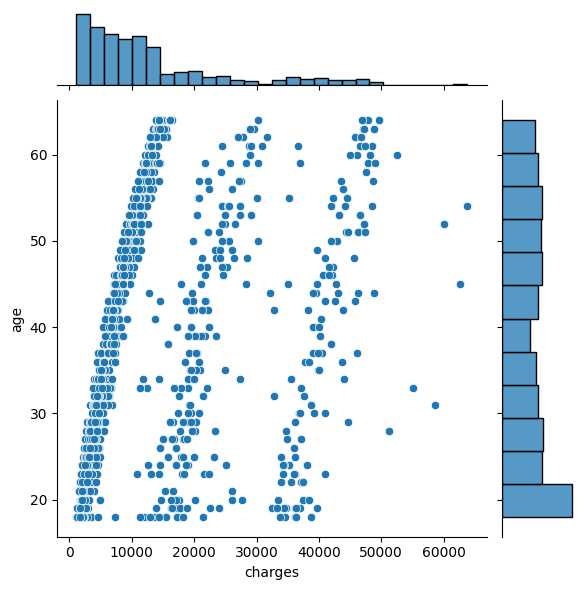

In [44]:
sns.jointplot(x=cleaned_insurance["charges"], y=cleaned_insurance["age"], kind='scatter')
plt.show()

Claims amount increase with the age and tend to form groups around 10.2k, up to 30k and more than 30k

## understand data
### impact of smoking

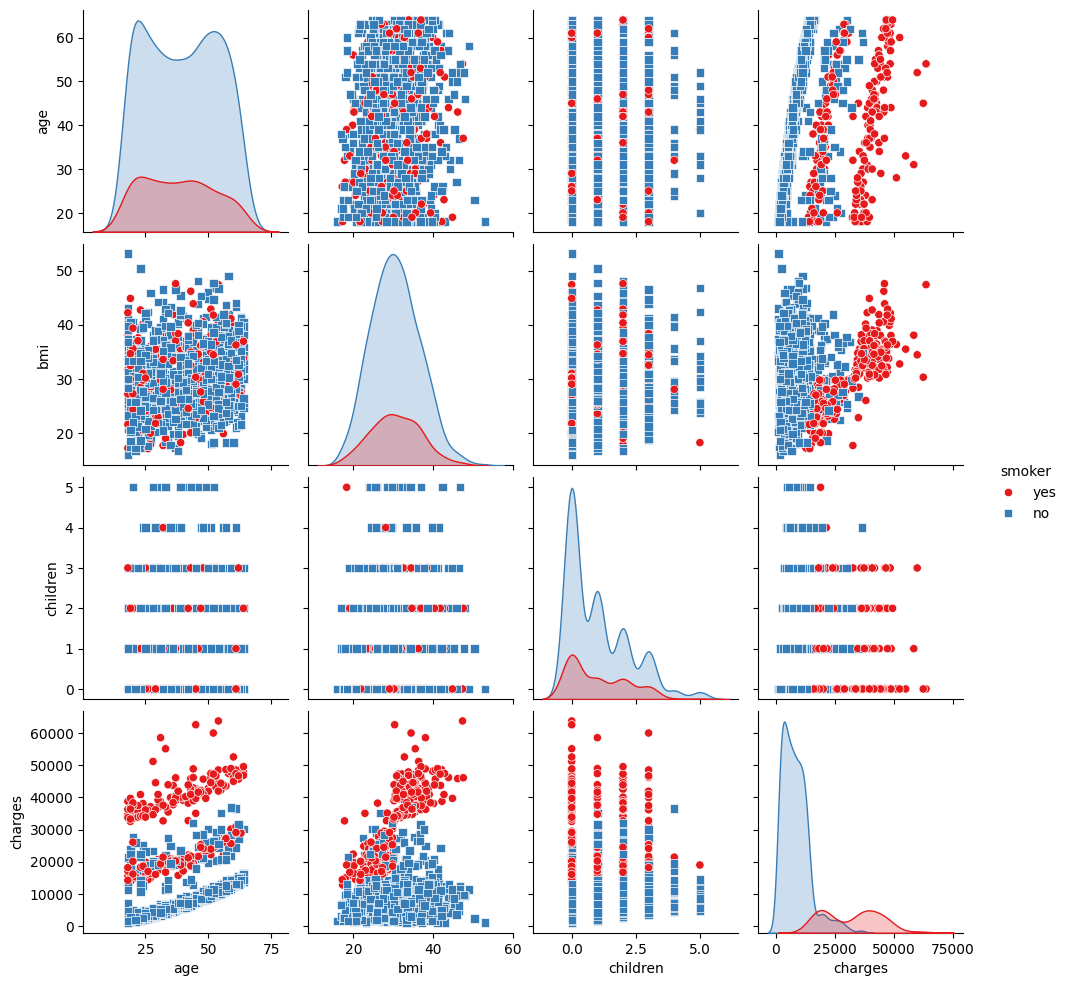

In [45]:
claim_pplot=cleaned_insurance[['age', 'bmi', 'children', 'smoker', 'charges']]
claim_pplot.head()
sns.pairplot(claim_pplot, kind="scatter", hue = "smoker" , markers=["o", "s"], palette="Set1")
plt.show()

Summary: smoker has impact of the charges

### Gender impact

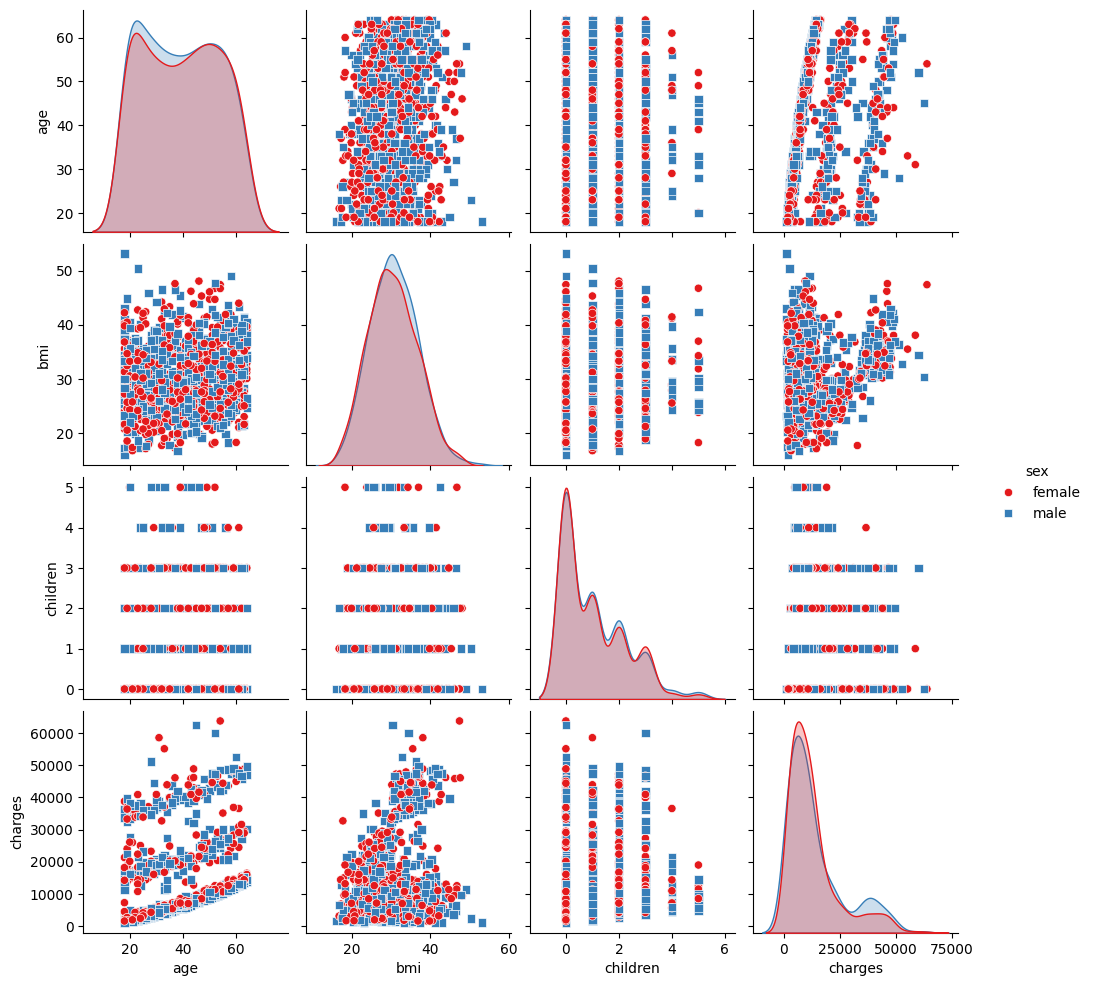

In [47]:
claim_pplot=cleaned_insurance[['age', 'bmi', 'children', 'sex', 'charges']]
claim_pplot.head()
sns.pairplot(claim_pplot, kind="scatter", hue = "sex" , markers=["o", "s"], palette="Set1")
plt.show()

Summary: Gender has very little impact of the charges

### Region impact

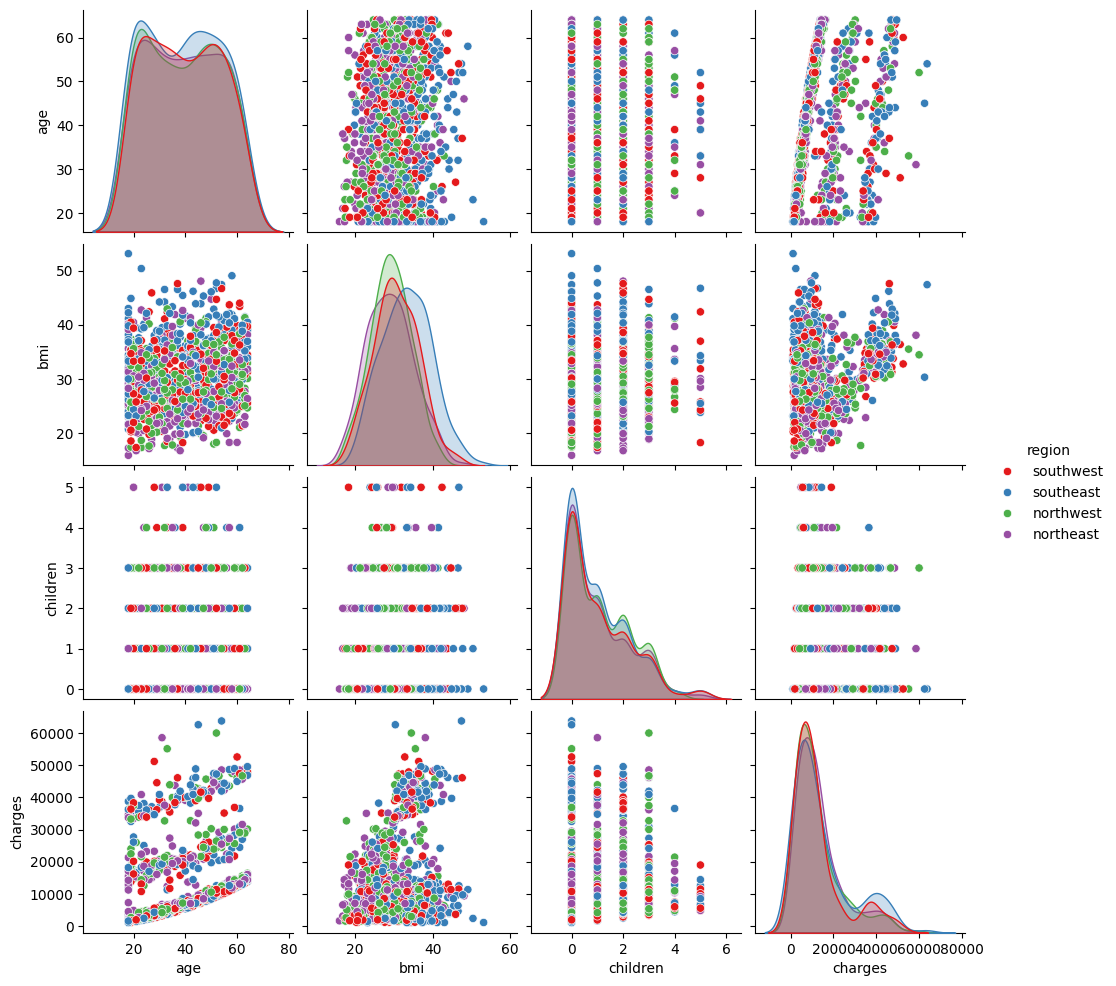

In [52]:
claim_pplot=cleaned_insurance[['age', 'bmi', 'children', 'region', 'charges']]
claim_pplot.head()
sns.pairplot(claim_pplot, hue = "region",palette="Set1" )
plt.show()

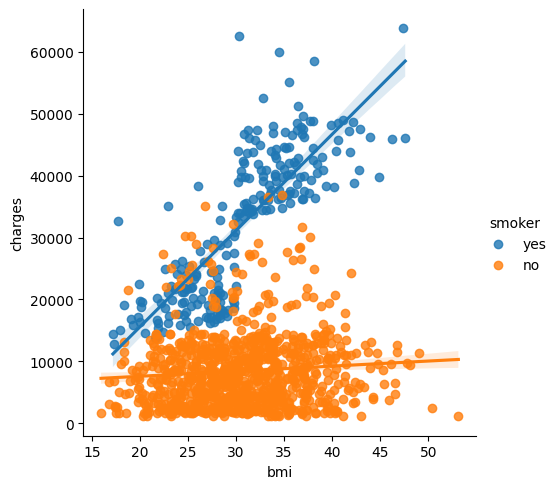

In [159]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=cleaned_insurance)

Summary: Region does have some impact on the charges;
is possible to see some trends as it relates to BMI, northwest higher BMI

Summary: The charges are highly affected by claimants being smocker on non-smocker.

These smokers tend to have BMIs above average, 30.

In [67]:
claim_pplot=cleaned_insurance[['age', 'bmi', 'children','charges']]
claim_pplot.head()

corr = claim_pplot.corr()
corr

,age,bmi,children,charges
age,1.000000,0.122207,0.062108,0.296813
bmi,0.122207,1.000000,0.003817,0.198159
children,0.062108,0.003817,1.000000,0.058995
charges,0.296813,0.198159,0.058995,1.000000


<Axes: >

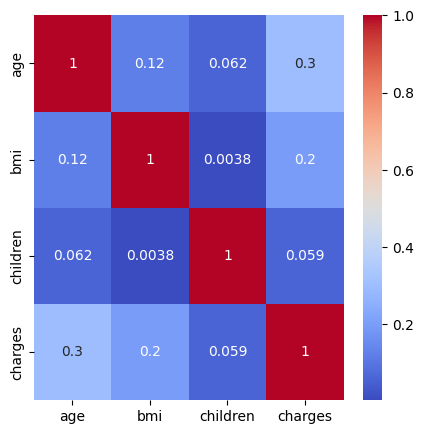

In [71]:
# display correlation matrix in heatmap
plt.figure(figsize=(5,5))
corr = claim_pplot.corr()
sns.heatmap(corr, annot=True,fmt='.2g', cmap='coolwarm')

# create and evaluate regression model

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

def create_and_evaluate_regression_model(df):
    """
    Prepares the data, fits a Linear regression model, and evaluates it using cross-validation.

    Parameters:
    -insurance: pandas dataframe, the cleaned insurance dataset

    Returns:
    - Atuple containing the fitted sklearn Pipeline object, mean MSE, and mena R2 scores.
    """

    # Preprocessing, defining features and target variable
    X= df.drop('charges', axis=1) # feature matrix
    Y= df['charges'] #target variable
    categorical_features = ['sex', 'smoker', 'region']
    numerical_features = ['age', 'bmi', 'children']

    #convert categorical features to dummy variables
    X_categorical = pd.get_dummies(X[categorical_features], drop_first=True)

    #combine numerical features with dummy variables
    X_processed = pd.concat([X[numerical_features], X_categorical], axis=1)

    #scaling numerical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_processed)

    #Linear regression model
    lin_reg = LinearRegression()

    # Pipeline
    steps = [('scaler', scaler), ('lin_reg', lin_reg)]
    df_model_pipeline = Pipeline(steps)

    # Fitting the model
    df_model_pipeline.fit(X_scaled, Y)

    #evaluating the model
    mse_scores = -cross_val_score(df_model_pipeline, X_scaled, Y, cv=5, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(df_model_pipeline, X_scaled, Y, cv=5, scoring='r2')
    mean_mse = np.mean(mse_scores)
    mean_r2 = np.mean(r2_scores)

    return df_model_pipeline, mean_mse, mean_r2

 ## usage model and evaluate

In [73]:
insurance_model, mean_mse, r2_score = create_and_evaluate_regression_model(cleaned_insurance)

In [74]:
print("Mean MSE:", round(mean_mse, 2))
print("Mean R2:", round(r2_score,2))

Mean MSE: 37431001.52
Mean R2: 0.75


R-squared score exceed 0.65, is 0.75, so the model has sucess

## Predict charges for data in 'validation_dataset.csv'

In [75]:
validation_data_path='validation_dataset.csv'
validation_data = pd.read_csv(validation_data_path)

validation_data.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


## Ensure that categorical features are properly transformed

In [76]:
validation_data_processed = pd.get_dummies(validation_data, columns=['sex', 'smoker','region'], drop_first = True)
validation_data_processed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,18.0,24.090000,1.0,False,False,False,True,False
1,39.0,26.410000,0.0,True,True,False,False,False
2,27.0,29.150000,0.0,True,True,False,True,False
3,71.0,65.502135,13.0,True,True,False,True,False
4,28.0,38.060000,0.0,True,False,False,True,False


## Make predictions using the trained model

In [77]:
validation_predictions =  insurance_model.predict(validation_data_processed )
validation_predictions


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([128624.1956431 , 220740.53744881, 181357.58860585, 423490.68727023,
       193247.43198909, 433941.97186074, 186218.04464669, 252649.36867594,
       264823.6923008 , 315699.54972133, 152763.35229667, 277047.21168668,
       284988.46912299, 282184.5021426 , 145617.51188492, 142421.29461991,
       504114.0952798 , 508824.75500872, 487443.02200438, 271554.00102112,
       136068.93631161, 263068.63243448, 216743.19650129, 260157.75138917,
       227344.02616272, 162867.76774393, 434958.43023302, 168698.94889606,
       277174.33895847, 248022.48883508, 179037.43598521, 159698.70026658,
       227451.21262823, 299729.33585202, 233027.62535648, 265826.62241741,
       450537.09074806, 284292.7769191 , 124341.58053782, 398926.0403722 ,
       199284.19524462, 224668.63093081, 175127.59932102, 493887.98045358,
       175421.68737896, 313219.22442233, 539604.17712338, 183228.048352  ,
       307774.80435573, 262448.38816472])

## Add predicted charges to the validation data

In [78]:
validation_data['predicted_charges'] = validation_predictions
validation_data.head()

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,128624.195643
1,39.0,male,26.410000,0.0,yes,northeast,220740.537449
2,27.0,male,29.150000,0.0,yes,southeast,181357.588606
3,71.0,male,65.502135,13.0,yes,southeast,423490.687270
4,28.0,male,38.060000,0.0,no,southeast,193247.431989


In [79]:
validation_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,50.0,46.820000,21.681074,18.000000,28.000000,44.500000,60.75000,92.000000
bmi,50.0,39.539907,17.725844,18.715000,27.575000,33.807500,40.20875,89.097296
children,50.0,2.780000,4.026899,0.000000,0.000000,1.000000,2.75000,13.000000
predicted_charges,50.0,271007.779151,113128.248656,124341.580538,181825.203542,256403.560033,305763.43723,539604.177123


## adjust predictions to ensure minimun charge is $1000

In [80]:
validation_data.loc[validation_data['predicted_charges']<1000, 'predicted_charges']=1000

## display the updated dataframe

In [81]:
validation_data.head()

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,128624.195643
1,39.0,male,26.410000,0.0,yes,northeast,220740.537449
2,27.0,male,29.150000,0.0,yes,southeast,181357.588606
3,71.0,male,65.502135,13.0,yes,southeast,423490.687270
4,28.0,male,38.060000,0.0,no,southeast,193247.431989


# create and evaluate different models

In [82]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [115]:
# spliting data
# Preprocessing, defining features and target variable
X= cleaned_insurance.drop('charges', axis=1) # feature matrix
Y= cleaned_insurance['charges'] #target variable
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

#convert categorical features to dummy variables
X_categorical = pd.get_dummies(X[categorical_features], drop_first=True)

#combine numerical features with dummy variables
X_processed = pd.concat([X[numerical_features], X_categorical], axis=1)

X_processed.head()


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,False,True,False,False,True
1,18.0,33.770,1.0,True,False,False,True,False
2,28.0,33.000,3.0,True,False,False,True,False
3,33.0,22.705,0.0,True,False,True,False,False
4,32.0,28.880,0.0,True,False,True,False,False


In [118]:
X_processed.isna().sum(), X_processed.shape

(age                 0
 bmi                 0
 children            0
 sex_male            0
 smoker_yes          0
 region_northwest    0
 region_southeast    0
 region_southwest    0
 dtype: int64,
 (1149, 8))

In [117]:
Y.isna().sum(), Y.shape

(0, (1149,))

In [120]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_processed,Y,test_size=.20, random_state=0)

In [104]:
# x_train,x_test,y_train,y_test

In [121]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [122]:
# Model Training and Testing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRFRegressor

In [123]:
lr=LinearRegression()

knn = KNeighborsRegressor(n_neighbors=10)

dt = DecisionTreeRegressor(max_depth = 3)

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

In [132]:
# Testing with linear regression
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r1 = round(r2_score(y_test,y_pred), 3)
round(r1, 2)

0.67

In [133]:
# Testing with KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
from sklearn.metrics import r2_score
r2 = round(r2_score(y_test,y_pred), 3)
round(r2, 2)

0.71

In [134]:
# Testing with DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
from sklearn.metrics import r2_score
r3 = round(r2_score(y_test,y_pred), 3)
round(r3, 2)

0.78

In [135]:
# Testing with RandomForestRegressor
rf = RandomForestRegressor(max_depth = 3, n_estimators=500)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
from sklearn.metrics import r2_score
r4 = round(r2_score(y_test,y_pred), 3)
round(r4, 2)

0.79

In [136]:
# Testing with AdaBoostRegressor
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
ada.fit(x_train,y_train)

y_pred = ada.predict(x_test)
from sklearn.metrics import r2_score
r5 = round(r2_score(y_test,y_pred),3)
round(r5, 2)

0.78

In [137]:
# Testing with GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
gbr.fit(x_train,y_train)

y_pred = gbr.predict(x_test)
from sklearn.metrics import r2_score
r6 = round(r2_score(y_test,y_pred), 3)
round(r6, 2)

0.8

In [138]:
# Model Results
metric_results= {'Model': ['linear Regression', 'KNeighbors', 'Decision Tree','RandomForest','AdaBoost','GradientBoosting'],
                 'R Square': [r1, r2, r3,r4,r5,r6]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R Square
0,linear Regression,0.666
1,KNeighbors,0.708
2,Decision Tree,0.776
3,RandomForest,0.790
4,AdaBoost,0.782
5,GradientBoosting,0.798


As GradientBoosting has higher R-squared means, that this is the model with a better job predicting.

However only 0.798 means that the regression explains 79.8% of the variation in Y variable.

As R-squared is 0.798, it implies that 79.8% of the variation of charges is explained by features like bmi, sex, age, children, region, smoker included in the model.

<Axes: xlabel='actual charges', ylabel='predicted charges'>

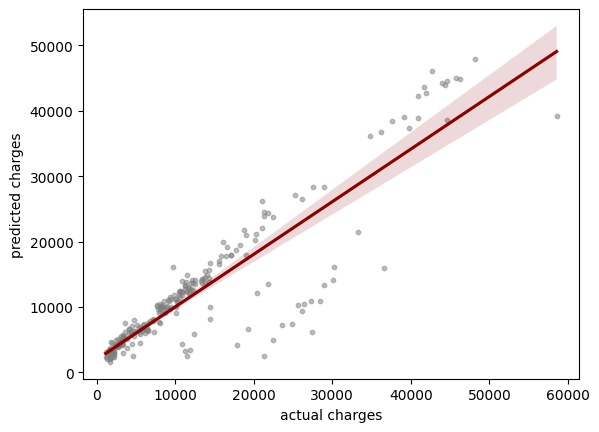

In [153]:

# plotting result
prediction= pd.DataFrame({'actual charges': y_test, 'predicted charges': y_pred})
sns.regplot(data=prediction, x='actual charges', y='predicted charges',
            scatter_kws=dict(color='gray', s=10, alpha=0.5),
            line_kws=dict(color='darkred'))